In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/home/yogeshsaini/.local/lib/python3.12/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [5]:
# read th desata set
df=pd.read_csv('/home/yogeshsaini/Machine Learning/Linear Regression Practical/height-weight.csv')

In [6]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Weight')

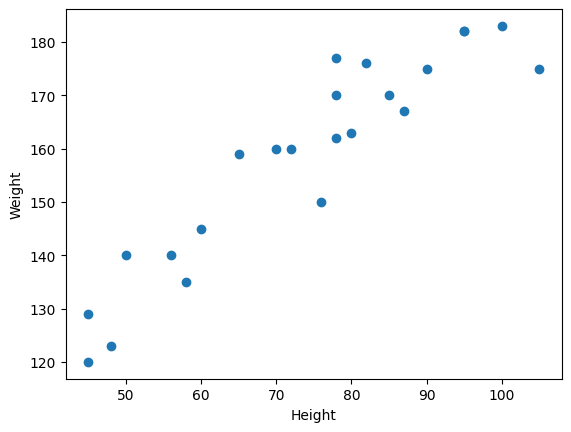

In [10]:
plt.scatter(df.Weight,df.Height)
plt.xlabel('Height')
plt.ylabel('Weight')

In [21]:
# divide our data set into independent and  dependent features
X = df[['Weight']] # independent feature
y = df['Height'] # dependent feature

In [22]:
X


,Weight
0,45
1,58
2,48
3,60
4,70
5,78
6,80
7,90
8,95
9,78


In [23]:
# train test splits
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [24]:
X.shape

(23, 1)

In [29]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((18, 1), (5, 1), (18,), (5,))

In [30]:
# standarize the data Train for independent feature
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


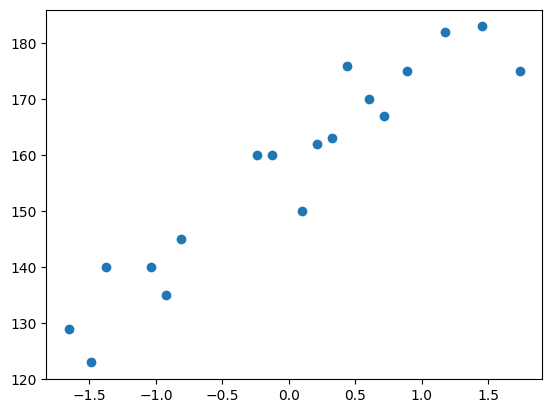

In [32]:
plt.scatter(X_train, y_train)

In [33]:
# train our model using the standard scaler linear regression
from sklearn.linear_model import LinearRegression

In [37]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
regressor.coef_
regressor.intercept_
print("the slope or coefficient of weights is ",regressor.coef_)
print("the intercept is ",regressor.intercept_)

the slope or coefficient of weights is  [17.03440872]
the intercept is  157.5


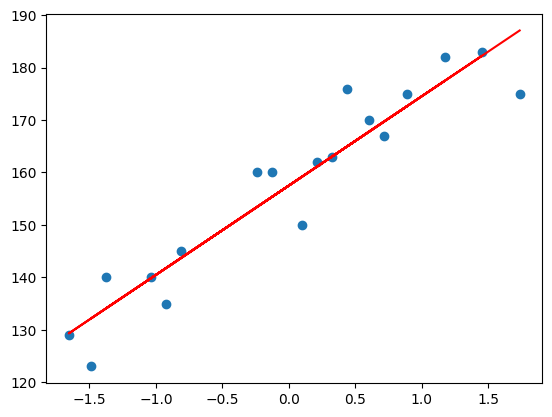

In [39]:
# create the best fit line for the regression
plt.scatter(X_train, y_train)
plt.plot(X_train, regressor.predict(X_train), color='red')

In [40]:
# predict the test data for the regression
y_pred_test = regressor.predict(X_test)

In [41]:
y_pred_test, y_test 

(array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
        148.56507414]),
 15    177
 9     170
 0     120
 8     182
 17    159
 Name: Height, dtype: int64)

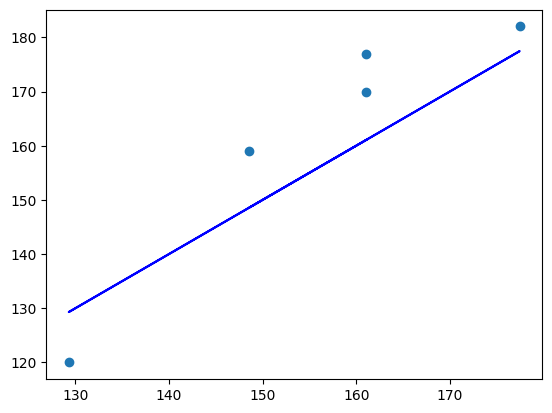

In [42]:
plt.scatter(y_pred_test, y_test)
plt.plot(y_pred_test, y_pred_test, color='blue')

In [44]:
#  performance matrix
#  MSE, MASE ,MAE, RMSE
#  R square, Adjusted R square



In [45]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [46]:
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
rmse = np.sqrt(mse)

In [47]:
print ("Mean Squared Error is ",mse)
print ("Mean Absolute Error is ",mae)
print ("Root Mean Squared Error is ",rmse)

Mean Squared Error is  109.77592599051654
Mean Absolute Error is  9.822657814519227
Root Mean Squared Error is  10.477400726827076


formula of r2 square
# R squared = 1 - (residual sum of squares / total sum of squares)
# Residual sum of squares = sum of (observed - predicted)^2
# Total sum of squares = sum of (observed - mean)^2

In [48]:

score = r2_score(y_test, y_pred_test)
print("R2 Score is ",score) 

R2 Score is  0.7769869860423441


In [49]:
#  display adjusted r squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7026493147231254

In [53]:
#  new dada point weights height prediction
scaled_weight = scaler.transform([[80]])
scaled_weight[0]

/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0.32350772])

In [54]:
predicted_weight = regressor.predict([scaled_weight[0]])
print("Predicted weight: ", predicted_weight)

Predicted weight:  [163.01076266]


Text(0.5, 1.0, 'Actual vs Predicted Values')

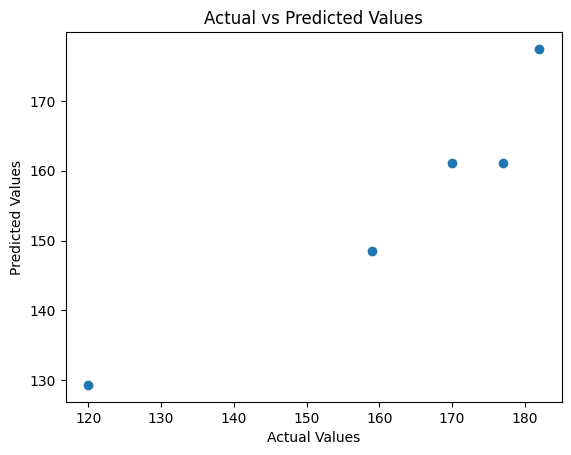

In [56]:
# assumption
# plot a scatter plot for the prediction
plt.scatter(y_test, y_pred_test)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')

In [59]:
# Residuals
residuals = y_test - y_pred_test
residuals


15    15.915329
9      8.915329
0     -9.304156
8      4.543549
17    10.434926
Name: Height, dtype: float64

/tmp/ipykernel_12501/3905197135.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals,kde=True)


<Axes: xlabel='Height', ylabel='Density'>

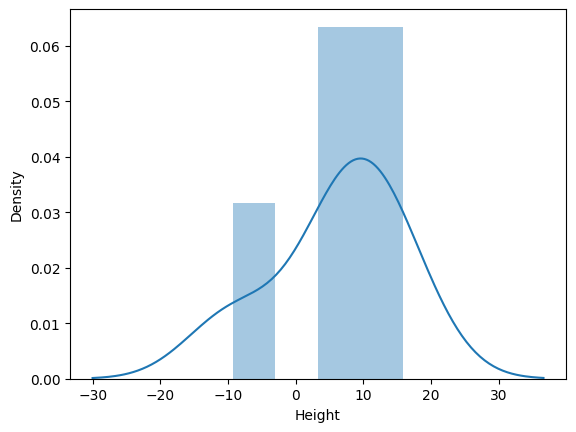

In [60]:
import seaborn as sns
sns.distplot(residuals,kde=True)